Let's get to it!

In [178]:
import numpy as np
import pandas as pd

In [179]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [180]:
df.isnull().sum().sum()

0

In [181]:
# y = wx + b

In [182]:
import matplotlib.pyplot as plt

In [183]:
x = [i for i in range(0, 16_000)]

w = 1
b = 0

y = [1000 * x_i + b for x_i in x]

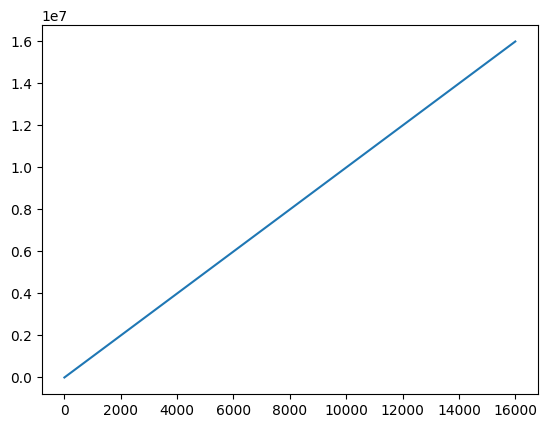

In [184]:
plt.plot(x, y);

In [185]:
df = df[['price', 'area']]

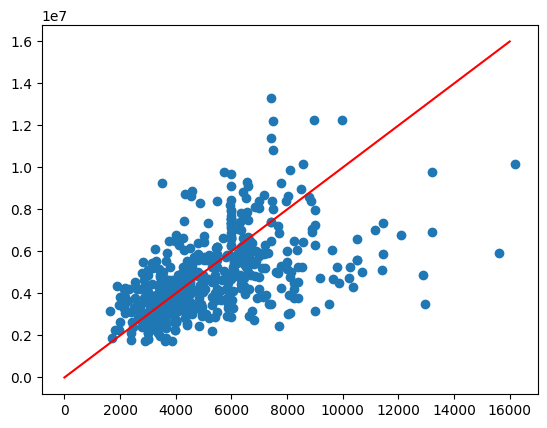

In [186]:
plt.scatter(df['area'], df['price'])
plt.plot(x, y, c='red')

In [187]:
x = df['area']
y = df['price']

In [188]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

In [189]:
min(x)

0.0

In [190]:
def cost_function(w, b, y_pred, y_true):
  loss = 0
  n = len(y_pred)
  assert(n == len(y_true))

  for i in range(n):
    loss += (y_pred[i] - y_true[i]) ** 2

  loss = loss / 2 * n

  return loss

In [191]:
def fit(x, y, epochs=100, lr=0.1):
  w = 1
  b = 0
  m = len(x)

  assert(m == len(y))


  for epoch in range(epochs):
    dw = 0
    db = 0

    for i in range(m):
      dw += (w * x[i] + b - y[i]) * x[i]
      db += (w * x[i] + b - y[i])

    w = w - (1 / m) * lr * dw
    b = b - (1 / m) * lr * db

    y_pred = [w * x_i + b for x_i in x]

    print(f'On epoch: {epoch} loss is: {cost_function(w, b, y_pred, y)}\n{"-" * 60}')

  return w, b